# Data source:
https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # ditribution plot

df_data = pd.read_csv('./kaggle_data/data.csv', delimiter=',')

#df_data_w_generes = pd.read_csv('./kaggle_data/data_w_genres.csv', delimiter=',')
#df_data_by_artist = pd.read_csv('./kaggle_data/data_by_artist.csv', delimiter=',')
#df_data_by_genres = pd.read_csv('./kaggle_data/data_by_genres.csv', delimiter=',')
#df_data_by_year = pd.read_csv('./kaggle_data/data_by_year.csv', delimiter=',')

# Korelacja

Najwyższą korelacje osigaja cechy Year i Popularity ~ 0.88 <br>
Jednak chcemy mieć zarówno Year jak i Popularity więc nie łączymy żadnych danych

In [2]:
df_data.corr()

acousticness  danceability  duration_ms    energy  explicit  \
acousticness          1.000000     -0.265950    -0.079311 -0.750283 -0.253690   
danceability         -0.265950      1.000000    -0.134500  0.220569  0.241891   
duration_ms          -0.079311     -0.134500     1.000000  0.036396 -0.043811   
energy               -0.750283      0.220569     0.036396  1.000000  0.142677   
explicit             -0.253690      0.241891    -0.043811  0.142677  1.000000   
instrumentalness      0.335821     -0.281429     0.084814 -0.287692 -0.138292   
key                  -0.021686      0.022599    -0.003116  0.029984  0.008578   
liveness             -0.023871     -0.105532     0.034270  0.126293  0.039272   
loudness             -0.567072      0.294170    -0.014687  0.782982  0.152695   
mode                  0.046475     -0.045306    -0.046981 -0.038355 -0.083221   
popularity           -0.593345      0.221077     0.063292  0.497488  0.214044   
speechiness          -0.056077      0.225305    -0.058449 -0.045226  0.413074   
tempo                -0.204982     -0.004872    -0.028816  0.249936  0.011484   
valence              -0.185540      0.560242    -0.198760  0.350086 -0.022327   
year                 -0.624550      0.203430     0.076293  0.532419  0.245227   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.335821 -0.021686 -0.023871 -0.567072  0.046475   
danceability             -0.281429  0.022599 -0.105532  0.294170 -0.045306   
duration_ms               0.084814 -0.003116  0.034270 -0.014687 -0.046981   
energy                   -0.287692  0.029984  0.126293  0.782982 -0.038355   
explicit                 -0.138292  0.008578  0.039272  0.152695 -0.083221   
instrumentalness          1.000000 -0.014268 -0.047397 -0.417033 -0.035051   
key                      -0.014268  1.000000 -0.000106  0.021920 -0.112766   
liveness                 -0.047397 -0.000106  1.000000  0.052985  0.005393   
loudness                 -0.417033  0.021920  0.052985  1.000000 -0.013147   
mode                     -0.035051 -0.112766  0.005393 -0.013147  1.000000   
popularity               -0.299829  0.010675 -0.075293  0.466546 -0.032854   
speechiness              -0.115735  0.015225  0.147667 -0.105796 -0.057493   
tempo                    -0.107570  0.003148  0.008124  0.211114  0.014539   
valence                  -0.193929  0.029064 -0.000426  0.308418  0.014727   
year                     -0.291571  0.012503 -0.055839  0.490118 -0.033084   

                  popularity  speechiness     tempo   valence      year  
acousticness       -0.593345    -0.056077 -0.204982 -0.185540 -0.624550  
danceability        0.221077     0.225305 -0.004872  0.560242  0.203430  
duration_ms         0.063292    -0.058449 -0.028816 -0.198760  0.076293  
energy              0.497488    -0.045226  0.249936  0.350086  0.532419  
explicit            0.214044     0.413074  0.011484 -0.022327  0.245227  
instrumentalness   -0.299829    -0.115735 -0.107570 -0.193929 -0.291571  
key                 0.010675     0.015225  0.003148  0.029064  0.012503  
liveness           -0.075293     0.147667  0.008124 -0.000426 -0.055839  
loudness            0.466546    -0.105796  0.211114  0.308418  0.490118  
mode               -0.032854    -0.057493  0.014539  0.014727 -0.033084  
popularity          1.000000    -0.135707  0.135047  0.009327  0.880724  
speechiness        -0.135707     1.000000 -0.010070  0.056383 -0.120937  
tempo               0.135047    -0.010070  1.000000  0.171182  0.137892  
valence             0.009327     0.056383  0.171182  1.000000 -0.029304  
year                0.880724    -0.120937  0.137892 -0.029304  1.000000

Pozbywamy się kolumn które nas nie interesują
* id - identyfikator utworu
* acousticness - czy utwór jest akustyczny czy nie
* energy - "energia" utworu niezbyt dokładnie opisana w dokumentacji - zdeydowaliśmy się zachować podobny paramentr - valence - określający "pozytywność" utworu, co w naszej opini ma większe znaczenie w naszym temacie
* release_date - pokrywa się z rokiem
* mode - wartość binarna 0/1
* key - główny ton utworu
* loudness - wartość w dB

In [3]:
df_new = df_data.copy()

df_new = df_new.drop(columns=['id',
                              'acousticness',
                              'explicit',
                              'energy',
                              'release_date',
                              'mode',
                              'key',
                              'loudness'])
df_new.head(5)

artists  danceability  duration_ms  \
0                       ['Carl Woitschach']         0.708       158648   
1  ['Robert Schumann', 'Vladimir Horowitz']         0.379       282133   
2                   ['Seweryn Goszczyński']         0.749       104300   
3                      ['Francisco Canaro']         0.781       180760   
4  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210       687733   

   instrumentalness  liveness                                           name  \
0             0.563    0.1510                    Singende Bataillone 1. Teil   
1             0.901    0.0763       Fantasiestücke, Op. 111: Più tosto lento   
2             0.000    0.1190                 Chapter 1.18 - Zamek kaniowski   
3             0.887    0.1110  Bebamos Juntos - Instrumental (Remasterizado)   
4             0.908    0.0980    Polonaise-Fantaisie in A-Flat Major, Op. 61   

   popularity  speechiness    tempo  valence  year  
0           0       0.0506  118.469   0.7790  1928  
1           0       0.0462   83.972   0.0767  1928  
2           0       0.9290  107.177   0.8800  1928  
3           0       0.0926  108.003   0.7200  1928  
4           1       0.0424   62.149   0.0693  1928

# Wykresy Wstępne do czyszczenia danych

Przeprowadziliśmy wstępną analizę danych aby sprawdzić trzy parametry:
* **Duration** - piosenki muszą trwać więcej niż jakaś wartość - nie może być to 5 sekund, 10 sekund, ale nie możemy odrzucić danych "bo tak nam się wydaje" - **chcemy znaleźć dolną granicę długości**
* **Popularity** - czy powinniśmy odrzucić piosenki niepopularne?
* **Year** - tutaj chcieliśmy po prostu zobaczyć czy nie pokaże się coś ciekawego

In [4]:
plt.rcParams['figure.figsize'] = [15, 5]

def plot_column_vs_duration(column):
    x = df_new.duration_ms
    x = list(map(lambda a: a/1000, x))
    y = df_new[column]
    plt.xlim(0, 150)
    plt.ylabel(column)
    plt.xlabel("duration")
    plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

## Duration

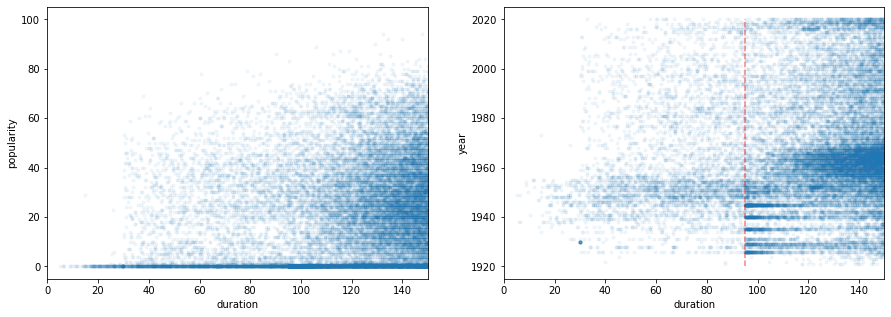

In [5]:
plt.subplot(1, 2, 1)
plot_column_vs_duration("popularity")
#plt.plot([95, 95], [0,100], c='r', alpha=0.5, linestyle='--')

plt.subplot(1, 2, 2)
plot_column_vs_duration("year")
plt.plot([95, 95], [1920,2020], c='r', alpha=0.5, linestyle='--')

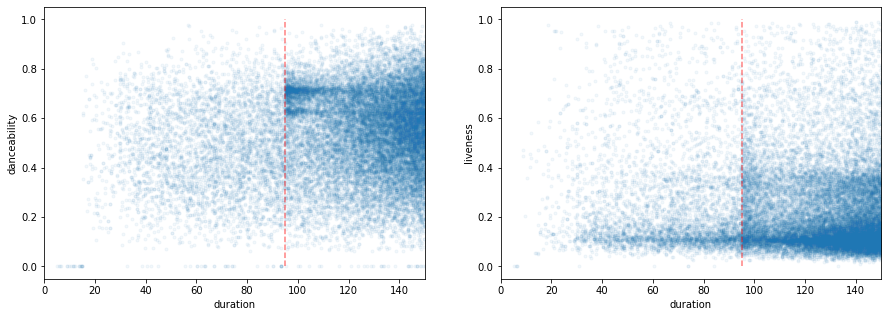

In [6]:
plt.subplot(1, 2, 1)
plot_column_vs_duration("danceability")
plt.plot([95, 95], [0,1], c='r', alpha=0.5, linestyle='--')

plt.subplot(1, 2, 2)
plot_column_vs_duration("liveness")
plt.plot([95, 95], [0,1], c='r', alpha=0.5, linestyle='--')

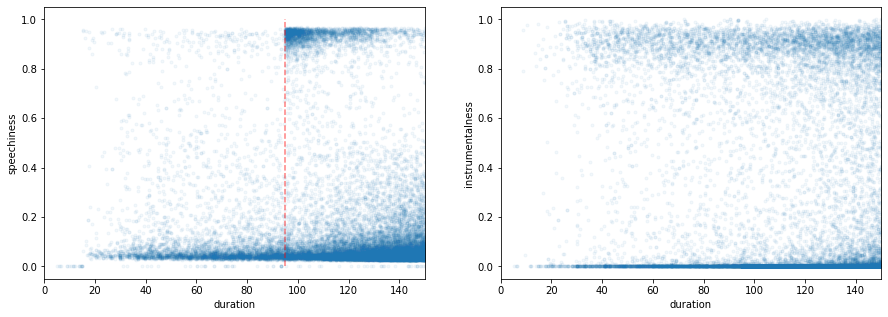

In [7]:
plt.subplot(1, 2, 1)
plot_column_vs_duration("speechiness")
plt.plot([95, 95], [0,1], c='r', alpha=0.5, linestyle='--')

plt.subplot(1, 2, 2)
plot_column_vs_duration("instrumentalness")
#plt.plot([95, 95], [0,1], c='r', alpha=0.5, linestyle='--')

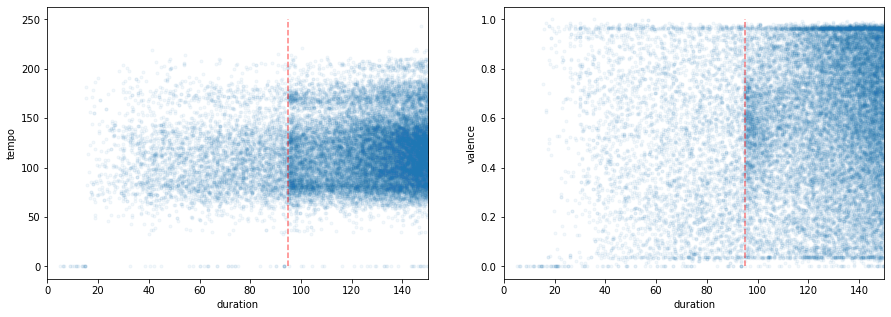

In [8]:
plt.subplot(1, 2, 1)
plot_column_vs_duration("tempo")
plt.plot([95, 95], [0,250], c='r', alpha=0.5, linestyle='--')

plt.subplot(1, 2, 2)
plot_column_vs_duration("valence")
plt.plot([95, 95], [0,1], c='r', alpha=0.5, linestyle='--')

(0.0, 1500.0)

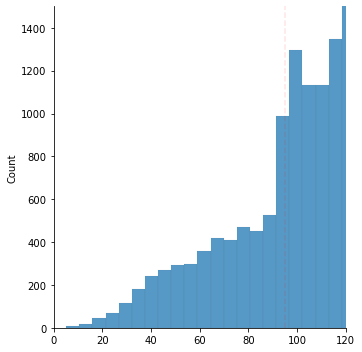

In [9]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
sns.displot(x, bins=1000)
plt.plot([95, 95], [0,6000], c='r', alpha=0.1, linestyle='--')
plt.xlim(0, 120)
plt.ylim(0, 1500)

In [10]:
df_new[(df_new.duration_ms < 30000)]

artists  danceability  \
590     ['Sergei Rachmaninoff', 'William Kapell', 'Fri...         0.441   
659     ['George Frideric Handel', 'The Liverpool Phil...         0.499   
681     ['George Frideric Handel', 'The Liverpool Phil...         0.392   
943     ['Igor Stravinsky', 'Columbia Symphony Orchest...         0.182   
1434               ['Hector Berlioz', 'Arturo Toscanini']         0.395   
...                                                   ...           ...   
162711           ['Igor Stravinsky', 'Leopold Stokowski']         0.154   
162724  ['Igor Stravinsky', 'Columbia Symphony Orchest...         0.340   
163021                                   ['Robert Frost']         0.695   
163074  ['Johann Sebastian Bach', 'Karl Erb', 'Concert...         0.252   
163207  ['Franz Lehár', 'Anton Niessner/Emmy Loose/Phi...         0.648   

        duration_ms  instrumentalness  liveness  \
590           17907          0.852000     0.468   
659           29427          0.000017     0.200   
681           25400          0.000340     0.648   
943           25200          0.993000     0.082   
1434          26880          0.973000     0.214   
...             ...               ...       ...   
162711        19227          0.890000     0.210   
162724        17400          0.805000     0.173   
163021        19597          0.000000     0.588   
163074        17533          0.000000     0.150   
163207        20293          0.000000     0.243   

                                                     name  popularity  \
590     Rhapsody on a Theme of Paganini, Op.43: Variat...           0   
659     Messiah, HWV 56, Pt. 1: Then shall the eyes of...           0   
681     Messiah, HWV 56, Pt. 1: Behold a virgin shall ...           0   
943     Le sacre du printemps: Part 1 "Adoration of th...           0   
1434    Roméo et Juliette, Op. 17, H. 79: Bruits loint...           0   
...                                                   ...         ...   
162711  Le sacre du printemps (The Rite of Spring): Pa...           0   
162724  The Firebird Suite: Prelude and Dance of the F...           0   
163021                                       Dust of Snow           0   
163074  St. Matthew Passion, BWV 244 - Part One: No.9a...           0   
163207  Die Lustige Witwe (2001 - Remaster), Act II: D...           0   

        speechiness    tempo  valence  year  
590          0.0557   82.922   0.9750  1945  
659          0.0448  103.023   0.0588  1946  
681          0.0848  145.021   0.3840  1946  
943          0.0604  118.462   0.0000  1948  
1434         0.0346  101.958   0.7800  1953  
...             ...      ...      ...   ...  
162711       0.0432  108.355   0.0000  1948  
162724       0.1890   74.875   0.0364  1948  
163021       0.9100   84.831   0.2250  1951  
163074       0.0495  171.199   0.4770  1952  
163207       0.7260  135.027   0.8980  1953  

[185 rows x 11 columns]

### Wniosek?
Usuwamy utwory o dlugosci mniejszej niz 95? 60 ? 30? No właśnie i tu jest problem. Po dalszej analizie (zedytuj wykresy zeby pokazac) zobaczyliśmy że większość utworów o długości mniejszej niż 60 sekund to utwory w latach 1920 - 1950

Ale gdzieś musi znajdować się ta granica poniżej której znajdują się przerywniki itp.

## Popularity

Słowem wstępu - popularność liczona jest na podstawie najpopularniejszego utworu w jakimś roku (dla 2020 był to utwór poniżej).

In [11]:
df_new[(df_new.popularity == 100)]

artists  danceability  duration_ms  instrumentalness  liveness  \
87942  ['The Weeknd']         0.514       200040          0.000095    0.0897   

                  name  popularity  speechiness    tempo  valence  year  
87942  Blinding Lights         100       0.0598  171.005    0.334  2020

In [12]:
def divider0_100(a, sectors):
    if(a==0):
        sectors[0] += 1
    elif(a < 20):
        sectors[1] += 1
    elif(a < 40):
        sectors[2] += 1
    elif(a < 60):
        sectors[3] += 1
    elif(a < 80):
        sectors[4] += 1
    else:
        sectors[5] += 1

def divider(a, sectors):
    if(a < 0.2):
        sectors[0] += 1
    elif(a < 0.4):
        sectors[1] += 1
    elif(a < 0.6):
        sectors[2] += 1
    elif(a < 0.8):
        sectors[3] += 1
    else:
        sectors[4] += 1

### Jak rozkłada się popularność utworów?

Jest bardzo dużo utwórów o popularności 0

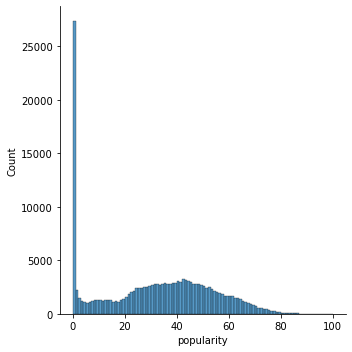

In [13]:
x = df_new.popularity
sns.displot(x, bins=100)

[27357, 24265, 50341, 50637, 16737, 572]

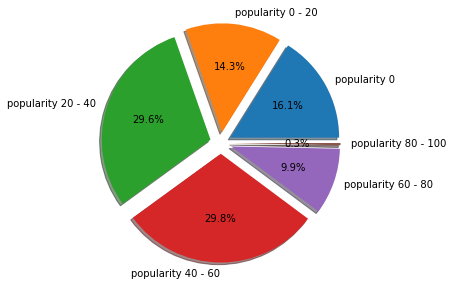

In [14]:
sectors = [0,0,0,0,0,0]

x = df_data.popularity

labels = ['popularity 0',
          'popularity 0 - 20',
          'popularity 20 - 40',
          'popularity 40 - 60',
          'popularity 60 - 80',
          'popularity 80 - 100']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
for a in x:
    divider0_100(a, sectors)

plt.pie(sectors, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True)
sectors

In [15]:
df_temp = df_data.copy()

df_temp.drop(df_temp[df_temp.popularity != 0].index, inplace=True)

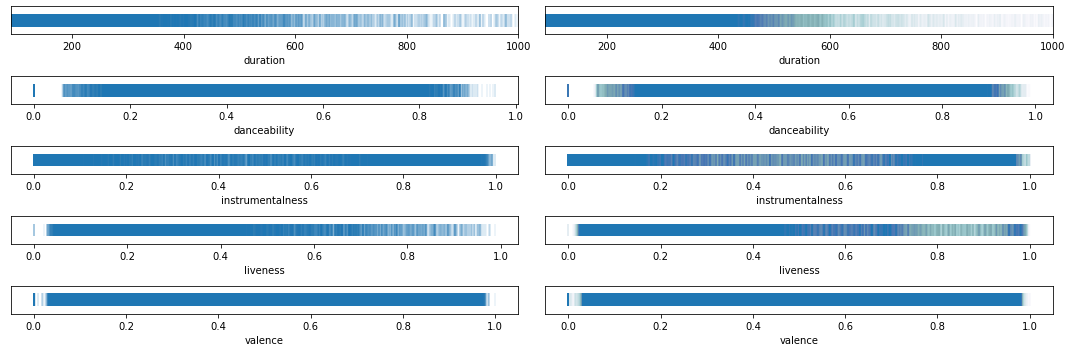

In [16]:
plt.subplot(5, 2, 1)
x = df_temp.duration_ms
x = list(map(lambda a: a/1000, x))
plt.xlim(90, 1000)
plt.xlabel("duration")
plt.yticks([])
plt.eventplot(x, alpha=0.1, cmap='viridis')

plt.subplot(5, 2, 2)
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
plt.xlim(90, 1000)
plt.xlabel("duration")
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(5, 2, 3)
x = df_temp.danceability
plt.xlabel("danceability")
plt.yticks([])
plt.eventplot(x, alpha=0.1, cmap='viridis')

plt.subplot(5, 2, 4)
x = df_data.danceability
plt.xlabel("danceability")
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(5, 2, 5)
x = df_temp.instrumentalness
plt.xlabel("instrumentalness")
plt.yticks([])
plt.eventplot(x, alpha=0.1, cmap='viridis')

plt.subplot(5, 2, 6)
x = df_data.instrumentalness
plt.xlabel("instrumentalness")
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(5, 2, 7)
x = df_temp.liveness
plt.xlabel("liveness")
plt.yticks([])
plt.eventplot(x, alpha=0.1, cmap='viridis')

plt.subplot(5, 2, 8)
x = df_data.liveness
plt.xlabel("liveness")
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(5, 2, 9)
x = df_temp.valence
plt.xlabel("valence")
plt.yticks([])
plt.eventplot(x, alpha=0.1, cmap='viridis')

plt.subplot(5, 2, 10)
x = df_data.valence
plt.xlabel("valence")
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.tight_layout()

### A czy można usunąć dane o popularity = 0?

Jak widać wyżej nie ma jakiejś jednoznacznej tendencji świadczącej o tym aby takie dane odrzucić

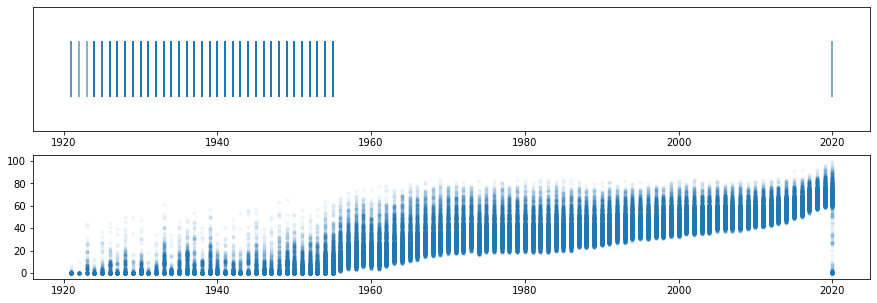

In [17]:
plt.subplot(2, 1, 1)
x = df_temp.year
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(2, 1, 2)
x = df_data.year
y = df_data.popularity
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

# Data by year

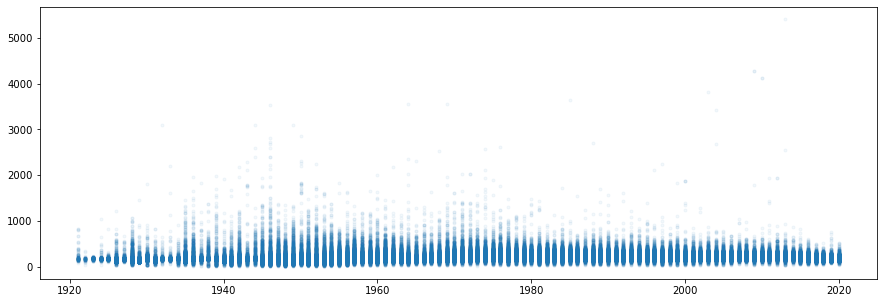

In [18]:
x = df_data.year
y = df_data.duration_ms
y = list(map(lambda a: a/1000, y))
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

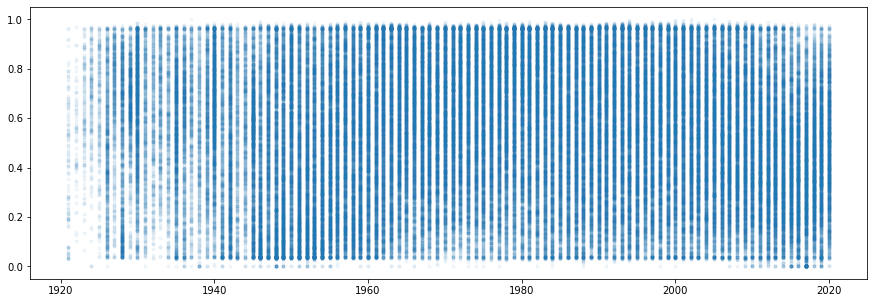

In [19]:
x = df_data.year
y = df_data.valence
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

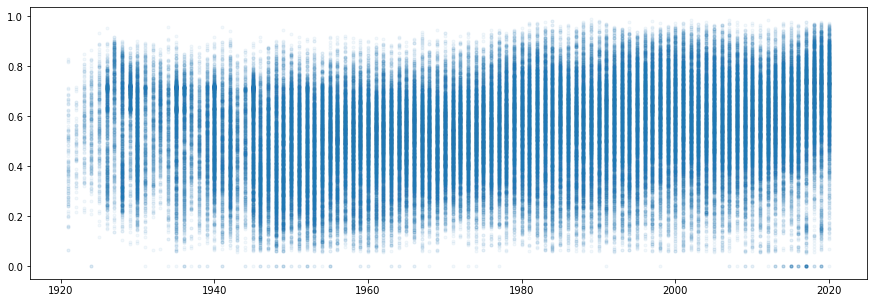

In [20]:
x = df_data.year
y = df_data.danceability
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

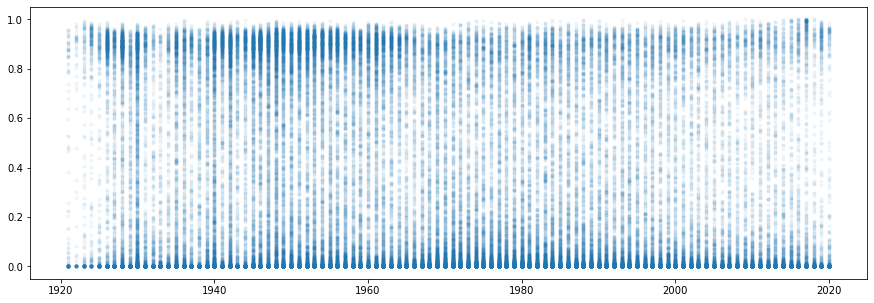

In [21]:
x = df_data.year
y = df_data.instrumentalness
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

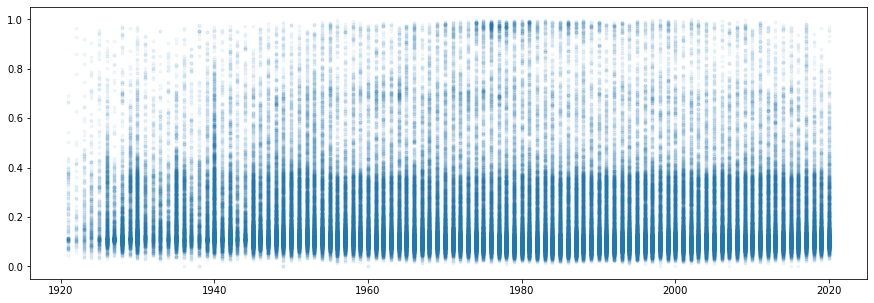

In [22]:
x = df_data.year
y = df_data.liveness
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

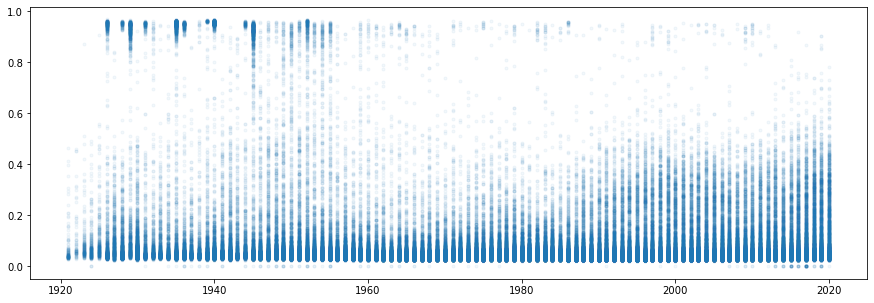

In [23]:
x = df_data.year
y = df_data.speechiness
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

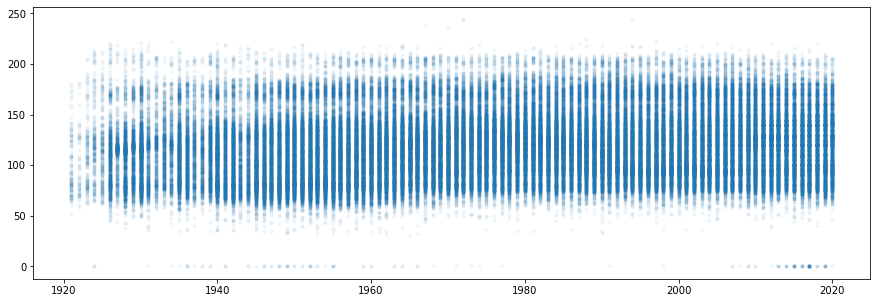

In [24]:
x = df_data.year
y = df_data.tempo
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

### Wniosek
Usuwamy utwory o tempie = 0.

Co oznacza utwór o tempie 0? Przykład poniżej

|   |   |   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|---|---|
|61972|	['Atlas Fret']|	0.0|	132827|	0.0|	0.000|	(silent track)|	40|	0.0|	0.0|	0.0|	2007|

# Przygotowanie i czyszczenie danych

Pierwszym krokiem jest zamiana ms na sekundy

In [25]:
df_new['duration'] = df_new['duration_ms'].map(lambda a: a/1000)
df_new = df_new.drop(columns=['duration_ms'])
#df_new

### czas < 95s

Pozbywamy się utworów krótszych niż

In [26]:
df_new.drop(df_new[df_new.duration < 95].index, inplace=True)
print(f"Wszystkie dane: {df_data.shape[0]}")
print(f"Zachowane dane: {df_new.shape[0]}")
print(f"Usuniety % wszystkich rekordów: {(1 - df_new.shape[0]/ df_data.shape[0]) * 100}%")

Wszystkie dane: 169909
Zachowane dane: 165324
Usuniety % wszystkich rekordów: 2.698503316481171%


### tempo = 0

Jak już wcześniej ustaliliśmy tempo 0 nie ma sensu a co za tym idzie odrzucamy takie dane

In [27]:
temp = df_new.shape[0]
df_new.drop(df_new[df_new.tempo == 0].index, inplace=True)
print(f"Wszystkie dane: {df_data.shape[0]}")
print(f"Zachowane dane: {df_new.shape[0]}")
print(f"Usuniety % wszystkich rekordów: {(1 - df_new.shape[0] / df_data.shape[0]) * 100}%")
print("wliczamy wszystkie poprzednie operacje - czyli usunelismy te o durr < 95 i tempo = 0")

Wszystkie dane: 169909
Zachowane dane: 165230
Usuniety % wszystkich rekordów: 2.753827048596602%
wliczamy wszystkie poprzednie operacje - czyli usunelismy te o durr < 95 i tempo = 0


In [28]:
# Jak szukac po wielu atrybutach
#df_new[(df_new.danceability == 0) & (df_new.instrumentalness == 0) & (df_new.tempo == 0)]

# Podstawowe wykresy

In [29]:
# czyste dane gotowe do analizy i eksploracji
df_ready_data = df_new.copy()

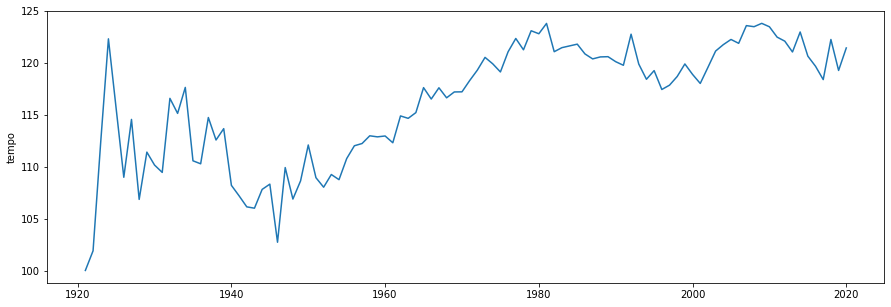

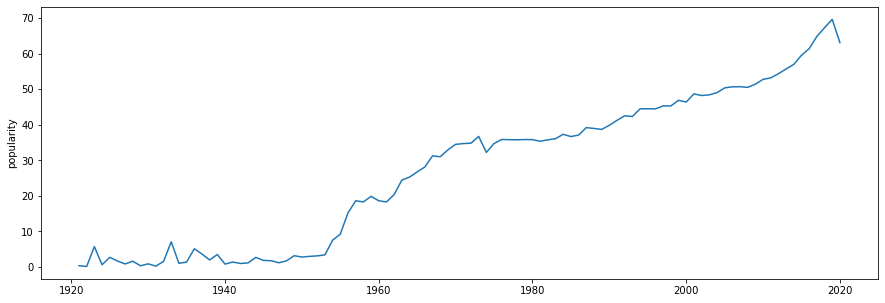

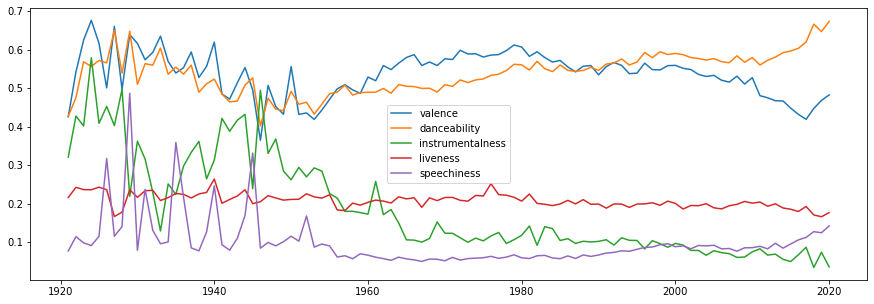

In [30]:
df_by_year = df_ready_data.groupby(['year']).aggregate({
    'duration': 'mean',
    'valence': 'mean',
    'danceability': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'popularity': 'mean',
    'speechiness': 'mean',
    'tempo': 'mean',
    })

plt.plot(df_by_year["tempo"])
plt.ylabel("tempo")
plt.show()

plt.plot(df_by_year["popularity"])
plt.ylabel("popularity")
plt.show()

plt.plot(df_by_year["valence"])
plt.plot(df_by_year["danceability"])
plt.plot(df_by_year["instrumentalness"])
plt.plot(df_by_year["liveness"])
plt.plot(df_by_year["speechiness"])

plt.legend(["valence", "danceability", "instrumentalness", "liveness", "speechiness"])

In [31]:
def make_pie_chart_0_1(column):
    sectors = [0,0,0,0,0]
    x = df_ready_data[column]

    labels = [f'{column} 0 - 0.2',
              f'{column} 0.2 - 0.4',
              f'{column} 0.4 - 0.6',
              f'{column} 0.6 - 0.8',
              f'{column} 0.8 - 1']
    explode = (0.1, 0.1, 0.1, 0.1, 0.1)
    for a in x:
        divider(a, sectors)
    
    plt.pie(sectors, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True)
    plt.show()

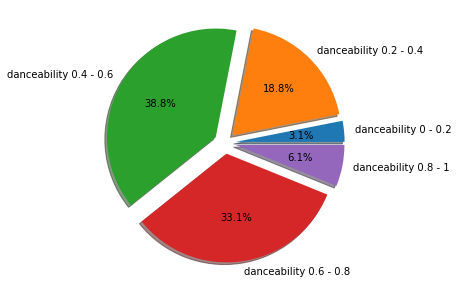

In [32]:
make_pie_chart_0_1("danceability")

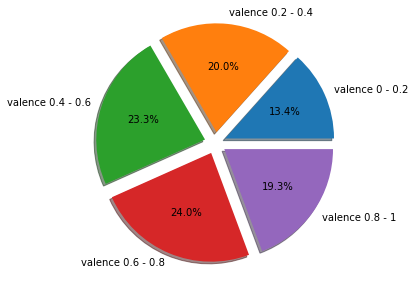

In [33]:
make_pie_chart_0_1("valence")

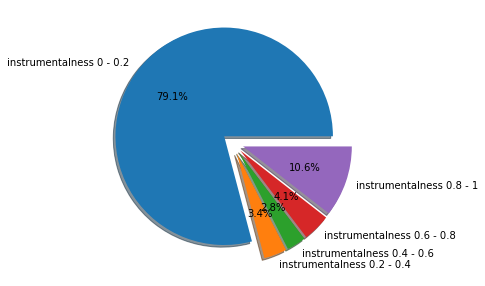

In [34]:
make_pie_chart_0_1("instrumentalness")

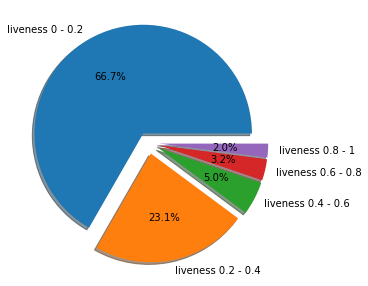

In [35]:
make_pie_chart_0_1("liveness")

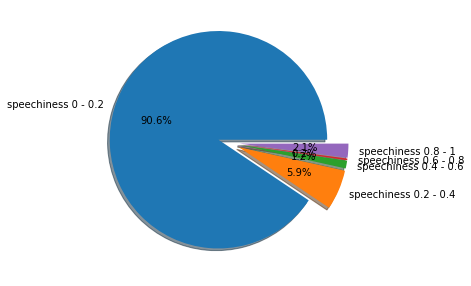

In [36]:
make_pie_chart_0_1("speechiness")

# Statystyki

Dalsze obliczenia nie mają sensu dla wartości nienumerycznych. Dodatkowo nie ma to sensu dla roku który jest interpretowany jako bardziej opisowy, a nie liczbowy.

In [37]:
df_ready_data_numeric = df_ready_data.copy()
df_ready_data_numeric = df_ready_data_numeric.drop(columns=['artists', 'name', 'year'])

In [38]:
df_ready_data_numeric_sum = pd.DataFrame(df_ready_data_numeric.isnull().sum(), columns = ["missing"])
df_ready_data_numeric_max = pd.DataFrame(df_ready_data_numeric.max(), columns = ["max"])
df_ready_data_numeric_min = pd.DataFrame(df_ready_data_numeric.min(), columns = ["min"])
df_ready_data_numeric_mean = pd.DataFrame(df_ready_data_numeric.mean(), columns = ["mean"])
df_ready_data_numeric_median = pd.DataFrame(df_ready_data_numeric.median(), columns = ["median"])
df_ready_data_numeric_std = pd.DataFrame(df_ready_data_numeric.std(), columns = ["std"])

frames = [df_ready_data_numeric_sum,
         df_ready_data_numeric_max,
         df_ready_data_numeric_min,
         df_ready_data_numeric_mean,
         df_ready_data_numeric_median,
         df_ready_data_numeric_std]

df_statistics = pd.concat(frames, axis=1)
df_statistics

missing       max       min        mean      median  \
danceability            0     0.988   0.05510    0.540222    0.550000   
instrumentalness        0     1.000   0.00000    0.155670    0.000184   
liveness                0     1.000   0.00967    0.205396    0.134000   
popularity              0   100.000   0.00000   31.984458   34.000000   
speechiness             0     0.969   0.02220    0.092631    0.044800   
tempo                   0   244.091  30.94600  117.228334  114.991000   
valence                 0     1.000   0.00001    0.533533    0.546000   
duration                0  4270.034  95.00000  235.952271  210.947000   

                         std  
danceability        0.174307  
instrumentalness    0.303401  
liveness            0.175803  
popularity         21.489470  
speechiness         0.147332  
tempo              30.465922  
valence             0.261192  
duration          119.079893

# Elementy Odosobnione - metoda 3 sigm

In [39]:
df_filled_out = pd.DataFrame();

from IPython.display import display

list_outliers = []

for column in df_ready_data_numeric:
    df_filled_out = pd.DataFrame(df_ready_data_numeric[
            (df_ready_data_numeric[column] > (df_statistics['mean'][column] + 3 * df_statistics['std'][column])) | (df_ready_data_numeric[column] < (df_statistics['mean'][column] - 3 * df_statistics['std'][column]))][column]).join(df_data['name'])
    if(column != "popularity"):
        list_outliers.extend(df_filled_out.index)
    display(df_filled_out)

Empty DataFrame
Columns: [danceability, name]
Index: []

Empty DataFrame
Columns: [instrumentalness, name]
Index: []

liveness                            name
119        0.877                 Edward the VIII
150        0.782  Siete Lágrimas - Remasterizado
352        0.917       Dinah, Some of These Days
353        0.825                  Capulet's Ball
377        0.809           Mere Jeevan Ke Saathi
...          ...                             ...
169564     0.911         Rain Sound : Night Time
169569     0.755                   Serenity Rain
169607     0.913                  Awakening Rain
169727     0.788                   Remember When
169795     0.776                      Out My Way

[4537 rows x 2 columns]

popularity                                               name
87940          99                       ROCKSTAR (feat. Roddy Ricch)
87942         100                                    Blinding Lights
87949          97  death bed (coffee for your head) (feat. beabad...

speechiness                            name
2             0.929  Chapter 1.18 - Zamek kaniowski
9             0.954   Chapter 1.3 - Zamek kaniowski
29            0.948  Chapter 4.12 - Zamek kaniowski
38            0.957  Chapter 4.10 - Zamek kaniowski
39            0.952  Chapter 2.11 - Zamek kaniowski
...             ...                             ...
169113        0.550                        Too Much
169124        0.619         Left Brain, Right Brain
169458        0.556                        Doubt It
169791        0.699              B*tch From Da Souf
169859        0.607              My Heart Went Oops

[4101 rows x 2 columns]

tempo                       name
146     210.173  Pantaleón - Remasterizado
280     211.089   Me Has Robado El Corazón
1832    212.242            Rocks In My Bed
5628    209.041          Return Of The Fly
5909    209.424              Lucio Vazquez
...         ...                        ...
164312  208.916        Blues In The Bottle
165740  211.186                 Protection
168319  208.706  I Wonder Why - Remastered
168550  209.774     El Favor De La Soledad
169386  215.669                   Paradise

[188 rows x 2 columns]

Empty DataFrame
Columns: [valence, name]
Index: []

duration                                               name
4        687.733        Polonaise-Fantaisie in A-Flat Major, Op. 61
83       785.427        Polonaise-Fantaisie in A-Flat Major, Op. 61
214      754.480  Brahms: Symphony No. 4 in E Minor, Op. 98: I. ...
217     1170.280  Bruckner: Symphony No. 5 in B-Flat Major: I. I...
308     1038.400  Symphony No. 9 in D Minor, Op. 125 "Ode to Joy...
...          ...                                                ...
167908   602.227                                         The Battle
168192   614.200                      The Only Moment We Were Alone
168263   768.640  Medley: Down Once More / Track Down This Murderer
168416   680.920                                  Dope House Family
169088   644.273  Piano Concerto No. 2 in C Minor, Op. 18: 2. Ad...

[2350 rows x 2 columns]

In [40]:
def plot_3_std(column, df):
    m = df_statistics['mean'][column]
    m_p3std = df_statistics['mean'][column] + 3 * df_statistics['std'][column]
    m_n3std = df_statistics['mean'][column] - 3 * df_statistics['std'][column]
    y = df
    y = y[column]
    x = range(len(y))
    plt.plot([0, len(y)], [m, m], c='r', linestyle='--')
    plt.plot([0, len(y)], [m_p3std, m_p3std], c='r', linestyle=':')
    plt.plot([0, len(y)], [m_n3std, m_n3std], c='r', linestyle=':')
    plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')
    plt.ylabel(column)
    plt.xticks([])
    plt.show()

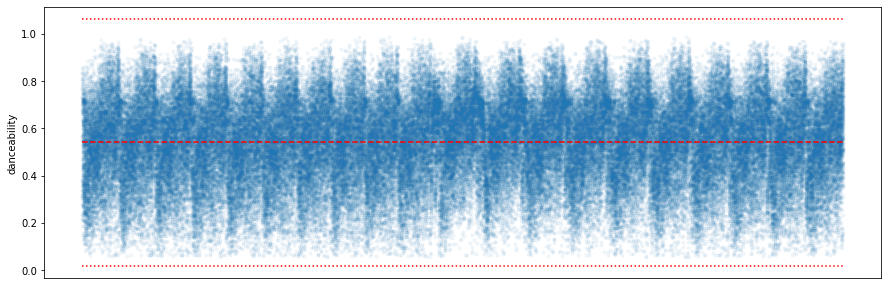

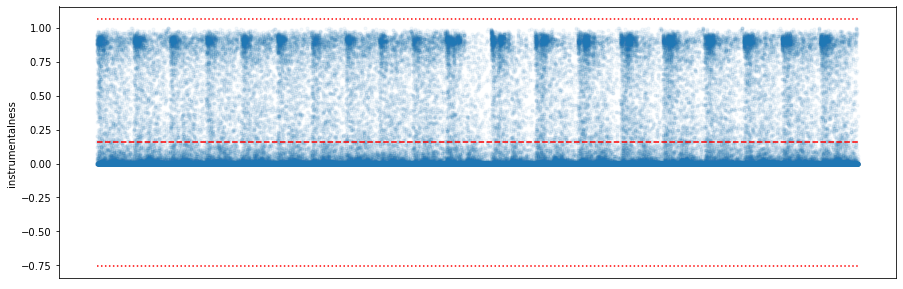

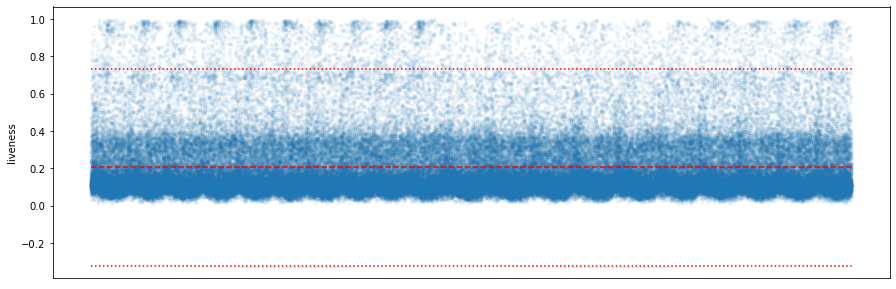

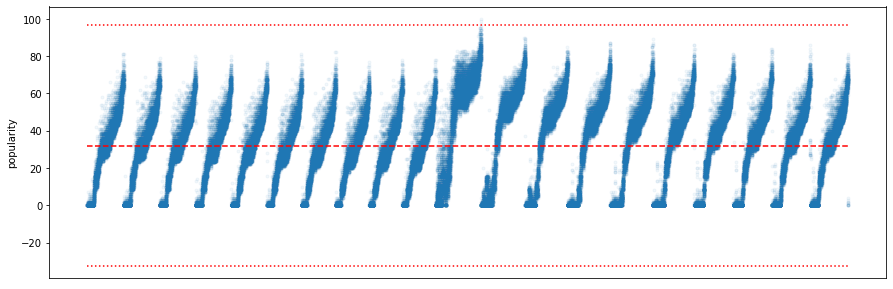

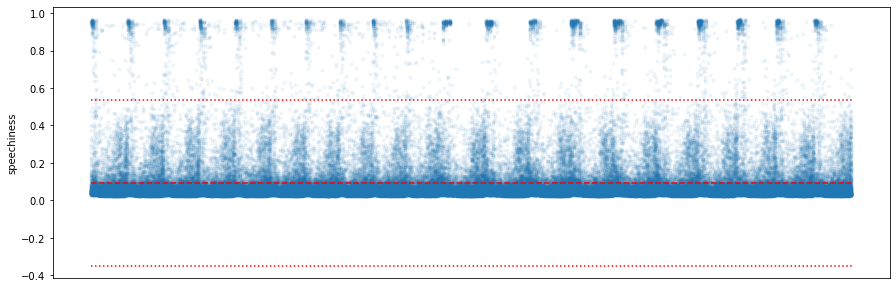

In [ ]:
for column in df_ready_data_numeric:
    plot_3_std(column, df_ready_data_numeric)

### Odrzucenie elementów odosobnionych

In [ ]:
list_outliers = list(dict.fromkeys(list_outliers))
df_data_without_outliers = df_ready_data.copy()
df_data_without_outliers = df_data_without_outliers.drop(list_outliers)

In [ ]:
for column in df_ready_data_numeric:
    plot_3_std(column, df_data_without_outliers)

# Elementy Odosobnione - metoda kwartyli

In [ ]:
def plot_quar(df, quartile_2, lower_bound, upper_bound):
    m = quartile_2
    m_p3std = lower_bound
    m_n3std = upper_bound
    y = df
    x = range(len(y))
    plt.plot([0, len(y)], [m, m], c='r', linestyle='--')
    plt.plot([0, len(y)], [m_p3std, m_p3std], c='r', linestyle=':')
    plt.plot([0, len(y)], [m_n3std, m_n3std], c='r', linestyle=':')
    plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')
    plt.ylabel(column)
    plt.xticks([])
    plt.show()

In [ ]:
list_outliers = []

def outliers_iqr(ys):
    quartile_1, quartile_2, quartile_3 = np.percentile(ys, [25, 50, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_2 - 2.2*(quartile_3 - quartile_1)
    upper_bound = quartile_2 + 2.2*(quartile_3 - quartile_1)
    
    plot_quar(ys, quartile_2, lower_bound, upper_bound)
    
    df_filled_out = pd.DataFrame(df_ready_data_numeric[((ys > upper_bound) | (ys < lower_bound))][column]).join(df_data['name'])
    list_outliers.extend(df_filled_out.index)
    display(df_filled_out)

In [ ]:
for column in df_ready_data_numeric:
    outliers_iqr(df_ready_data_numeric[column])

### Odrzucenie elementów odosobnionych

In [ ]:
list_outliers = list(dict.fromkeys(list_outliers))
df_data_without_outliers_quartile = df_ready_data.copy()
df_data_without_outliers_quartile = df_data_without_outliers_quartile.drop(list_outliers)

### Porównanie

In [ ]:
df_data_without_outliers_quartile.shape[0]

In [ ]:
df_data_without_outliers.shape[0]

# Klasteryzacja

### <span style="color:red"> UWAGA - kod nie jest wyczyszczony</span>

wychodzi na to ze dlugosc trzeba by znormalizowac, bo bazujemy na odleglosciach

In [ ]:
#df_data_without_outliers

In [ ]:
df_data_without_outliers_numeric = df_data_without_outliers.copy()
df_data_without_outliers_numeric = df_data_without_outliers_numeric.drop(columns=['artists', 'name', 'year'])
df_data_without_outliers_numeric

In [ ]:
df_data_without_outliers_quartile_numeric = df_data_without_outliers_quartile.copy()
df_data_without_outliers_quartile_numeric = df_data_without_outliers_quartile_numeric.drop(columns=['artists', 'name', 'year'])
df_data_without_outliers_quartile_numeric

### Normalizacja

In [ ]:
#df_data_without_outliers_numeric_normalized[df_data_without_outliers_numeric_normalized.tempo == 1]

In [ ]:
#df_statistics['max'].duration

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [ ]:
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(df_data_without_outliers_numeric)

df_data_without_outliers_numeric_normalized = df_data_without_outliers_numeric.copy()
df_data_without_outliers_quartile_numeric_normalized = df_data_without_outliers_quartile_numeric.copy()

In [ ]:
df_data_without_outliers_numeric_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df_data_without_outliers_numeric))
df_data_without_outliers_numeric_normalized.columns = df_data_without_outliers_numeric.columns

df_data_without_outliers_quartile_numeric_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df_data_without_outliers_quartile_numeric))
df_data_without_outliers_quartile_numeric_normalized.columns = df_data_without_outliers_quartile_numeric.columns

In [ ]:
#df_data_without_outliers_numeric_normalized = df_data_without_outliers_numeric_normalized.drop(columns=["duration"])

In [ ]:
'''
silhouette_averages = []

for n_clusters in range(2, 100):
    kmeans = KMeans(
            n_clusters = n_clusters,
            n_init = 10,
            max_iter = 300,
            random_state = 43)

    kmeans.fit(df_data_without_outliers_numeric_normalized)
    sil_sco = silhouette_score(X = df_data_without_outliers_numeric_normalized, labels = kmeans.labels_, n_jobs=-1)
    print(f"clusters:{n_clusters}, sil:{sil_sco}")
    silhouette_averages.append(sil_sco)
'''
#silhouette_averages

df_shiluete = pd.read_csv('./shiluette_data.csv', delimiter=',')
df_shiluete = df_shiluete.set_index('clusters')



plt.plot(df_shiluete)
plt.plot(range(2,10),[0.48609340469766976, 0.37380942906962306, 0.3054526161575595, 0.2946463745977001, 0.2748497574289172, 0.25914192258462915, 0.2677872267159986, 0.2665095137766266],)


In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=43)

kmeans_quartile = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=43)

#kmedoids = KMedoids(n_clusters=2, random_state=43)

clusters_data = kmeans.fit(df_data_without_outliers_numeric_normalized)
clusters_data_quartile = kmeans_quartile.fit(df_data_without_outliers_quartile_numeric_normalized)

#clusters_data_kmedoids_quartile = kmedoids.fit(df_data_without_outliers_quartile_numeric_normalized)
#sil_sco = silhouette_score(X = df_data_without_outliers_numeric, labels = kmeans.labels_)

In [ ]:
#silhouette_score(X = df_data_without_outliers_numeric_normalized, labels = kmeans.labels_, n_jobs=-1)

# 0.36328850053475936

In [ ]:
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

def plot_clusters(x_column, y_column, df, clusters_data):
    colors = cm.nipy_spectral(clusters_data.labels_.astype(float) / len(clusters_data.cluster_centers_))

    x = df[x_column]
    y = df[y_column]

    plt.scatter(x, y, marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusters_data.cluster_centers_
    # Draw white circles at cluster centers
    plt.scatter(centers[:, df.columns.get_loc(x_column)],
                centers[:, df.columns.get_loc(y_column)],
                marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        plt.scatter(c[df.columns.get_loc(x_column)],
                    c[df.columns.get_loc(y_column)],
                    marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    
    plt.show()





def plot_clusters_3d(x_column, y_column, z_column, df, clusters_data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = cm.nipy_spectral(clusters_data.labels_.astype(float) / len(clusters_data.cluster_centers_))

    x = df[x_column]
    y = df[y_column]
    z = df[z_column]

    ax.scatter(x, y, z, marker='.', s=5, lw=0, alpha=0.5, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusters_data.cluster_centers_
    # Draw white circles at cluster centers
    ax.scatter(centers[:, df.columns.get_loc(x_column)],
                centers[:, df.columns.get_loc(y_column)],
                centers[:, df.columns.get_loc(z_column)],
                marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter(c[df.columns.get_loc(x_column)],
                    c[df.columns.get_loc(y_column)],
                    c[df.columns.get_loc(z_column)],
                    marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_zlabel(z_column)


In [ ]:
for col1 in df_data_without_outliers_numeric_normalized:
    plot_clusters("tempo", col1, df_data_without_outliers_numeric_normalized, clusters_data)

In [ ]:
plot_clusters_3d("valence", "tempo", "popularity", df_data_without_outliers_numeric_normalized, clusters_data)

In [ ]:
plot_clusters("valence", "tempo", df_data_without_outliers_numeric_normalized, clusters_data)

In [ ]:
for col1 in df_data_without_outliers_quartile_numeric_normalized:
    plot_clusters("tempo", col1, df_data_without_outliers_quartile_numeric_normalized, clusters_data_quartile)

### Opis Klastrów

#### Klaster 1 [etykieta 0]
* danceability - niższe
* instrumentalness - wyższe ???
* popularity - niższe 
* tempo - niższe
* valence - niższe
* duration - nieco wyższe

#### Klaster 2 [etykieta 1]
* danceability - wyższe
* instrumentalness - niższe ???
* popularity - wyższe 
* tempo - wyższe
* valence - wyższe
* duration - nieco niższe


In [ ]:
epsilon = 0.001

df_prew_step = df_data_without_outliers_quartile_numeric_normalized.copy()

clus_temp = clusters_data_quartile
df_temp = df_data_without_outliers_quartile_numeric_normalized.copy()
for column in df_temp:
    data = df_temp[(df_temp[column] < (clus_temp.cluster_centers_[:, df_temp.columns.get_loc(column)][0] + epsilon)) &
                   (df_temp[column] > (clus_temp.cluster_centers_[:, df_temp.columns.get_loc(column)][0] - epsilon))]
    df_prew_step = pd.merge(df_prew_step, data, how='inner', on=[column]) 
    print(df_prew_step)

Tam gdzie nie odrzucilismy pojawiaja sie klastry

In [ ]:
#plt.close("all")
#sns.clustermap(df_data_without_outliers_quartile_numeric)

# Klasyfikacja

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

df_classification = df_data_without_outliers_quartile_numeric_normalized.drop(columns=["popularity", "valence", "liveness", "speechiness"])
clus_dat = clusters_data_quartile

def kneighbours_clasifier_leave_one_out(index):
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(df_classification[
                    df_classification.index != index],
              [x for i,x in enumerate(clus_dat.labels_) if i != index])
    KNeighborsClassifier(...)
    return (neigh.predict(df_classification[
        df_classification.index == index]) == clus_dat.labels_[index])[0]

In [ ]:
#df_data_without_outliers_numeric_normalized[df_data_without_outliers_numeric_normalized.index == 1]
#clusters_data.labels_[652]

global clacifier_efficeincy_status
clacifier_efficeincy_status = 0

for index in df_data_without_outliers_numeric_normalized.index:
    clacifier_efficeincy_status += kneighbours_clasifier_leave_one_out(index)
    if (index % 1000 == 0):
        print(f"{clacifier_efficeincy_status / (index+1) * 100}%")

In [ ]:
#(neigh.predict(df_data_without_outliers_numeric_normalized[df_data_without_outliers_numeric_normalized.index == index]) == clusters_data.labels_[index])[0]

Under 1950

by gatunek z drugiego pliku

In [ ]:
global clacifier_efficeincy_status
clacifier_efficeincy_status = 0

for index in df_classification.index:
    clacifier_efficeincy_status += kneighbours_clasifier_leave_one_out(index)
    if (index % 1000 == 0):
        print(f"{clacifier_efficeincy_status / (index+1) * 100}%")